In [1]:
using Plots

In [3]:
# dane
k= 0.5
g = 9.81
m = 2
v₀ = 20
α = π / 4
# obliczenia
v₀₁ = v₀ * cos(α) # 1 --> x
v₀₂ = v₀ * sin(α) # 2 --> y
F₁ = 0
F₂ = -m*g
a₁ = F₁/m # przyśpieszenie poziome x
a₂ = F₂/m # przyśpieszenie pionowe y
hₘ = ((v₀ * sin(α))^ 2) / (2 * g) # maksymalna wysokość
tᵤ = (v₀ * sin(α)) / g # czas wznoszenia
tₗ = sqrt((2 * hₘ) / g) # czas spadania
z = (v₀ ^ 2 * sin(2 * α)) / g # zasięg

40.77471967380224

In [35]:
function x(v₀, α)
    t -> v₀ * t * cos(α), 0, tₗ + tᵤ
end

function y(v₀, α, g)
    t -> v₀ * t * sin(α) - (g * t ^ 2) / 2, 0, tₗ + tᵤ
end

tor_ruchu (generic function with 1 method)

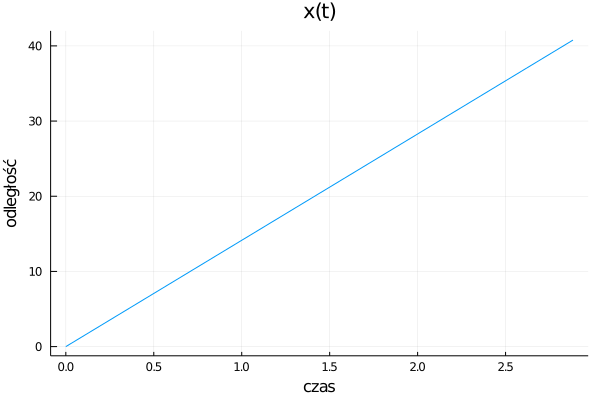

In [34]:
plot(x(v₀, α), 0, tₗ + tᵤ,
    xlabel = "czas", 
    ylabel = "odległość",
    legend =:none,
    title = "x(t)")

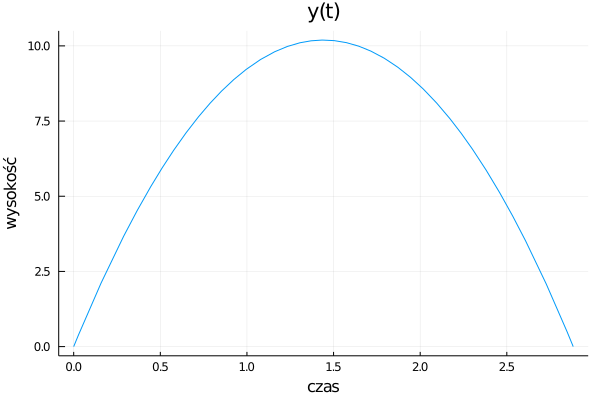

In [37]:
plot(y(v₀, α, g), 0, tₗ + tᵤ,
    xlabel = "czas", 
    ylabel = "wysokość", 
    legend =:none,
    title = "y(t)")
### dodac maksimum

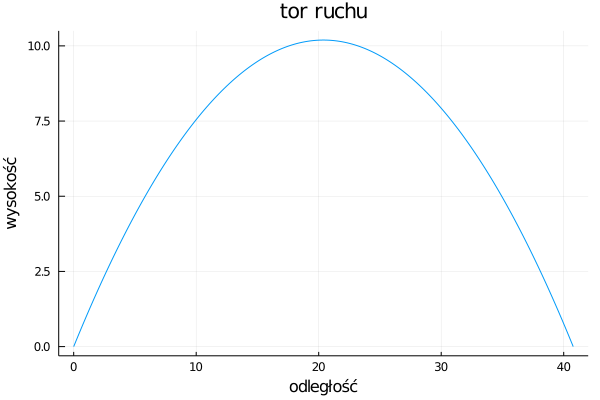

In [80]:
plot(x(v₀, α), y(v₀, α, g), 0, tₗ + tᵤ, 
    xlabel = "odległość", 
    ylabel = "wysokość",
    legend =:none,
    title = "tor ruchu")

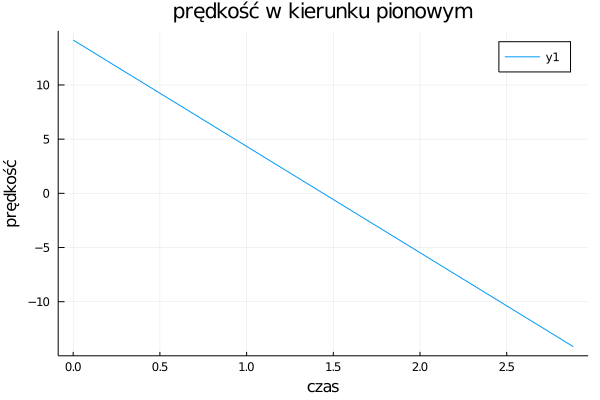

In [38]:
plot(t -> v₀ * sin(α) - g * t, 0, tₗ + tᵤ,
    xlabel = "czas", 
    ylabel = "prędkość", 
    title = "prędkość w kierunku pionowym")

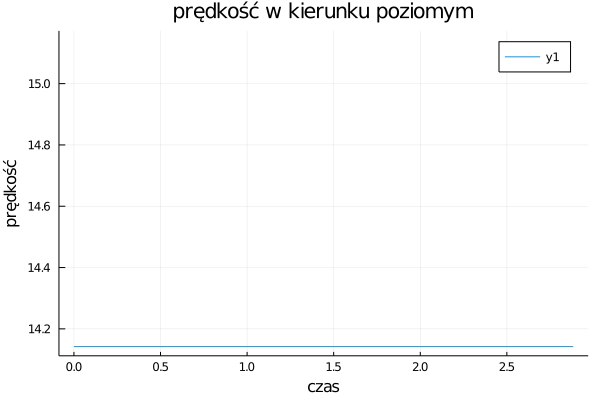

In [39]:
plot(t -> v₀ * cos(α), 0, tₗ + tᵤ,
    xlabel = "czas", 
    ylabel = "prędkość", 
    title = "prędkość w kierunku poziomym")

In [40]:
function x_opor(m, k, v₀, α)
    t -> m/k * v₀ * cos(α) * (1 - exp((-k / m) * t)), 0, tₗ + tᵤ
end

function y_opor(m, k, v₀, α, g)
    t -> (m/k * v₀ * sin(α) + (m/k)^2 * g) * (1 - exp((-k / m) * t)) - (m / k) * g * t, 0, tₗ + tᵤ
end

y_opor (generic function with 1 method)

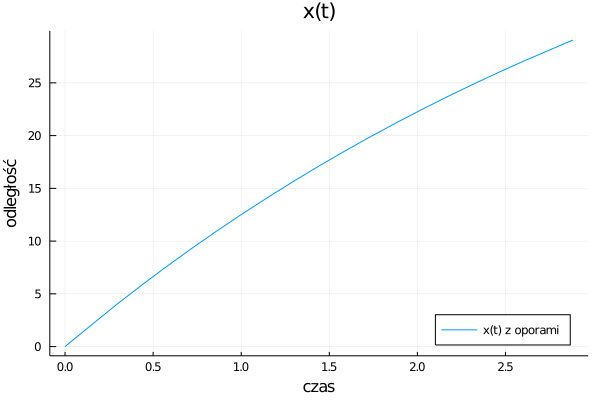

In [66]:
plot(x_opor(m, k, v₀, α), 0, tₗ + tᵤ,
    xlabel = "czas", 
    ylabel = "odległość", 
    label = "x(t) z oporami",
    legend =:bottomright,
    title = "x(t)")

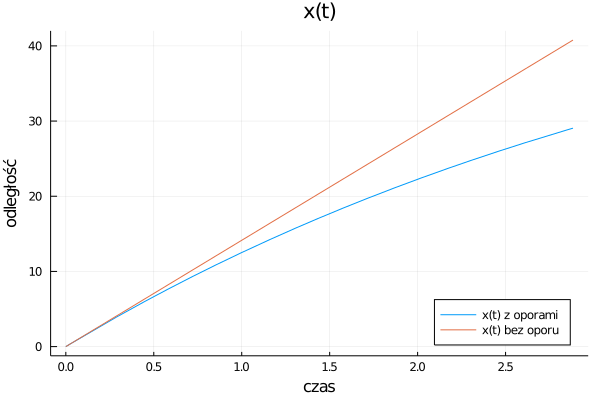

In [67]:
plot!(x(v₀, α), 0, tₗ + tᵤ,
    label = "x(t) bez oporu")

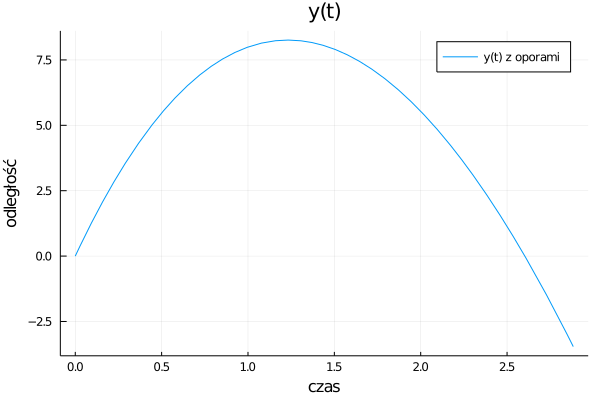

In [74]:
plot(y_opor(m, k, v₀, α, g), 0, tₗ + tᵤ,
    xlabel = "czas", 
    ylabel = "odległość", 
    label = "y(t) z oporami",
    legend =:topright,
    title = "y(t)")

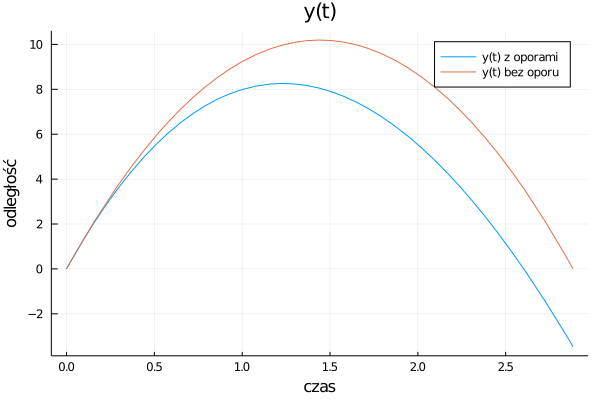

In [75]:
plot!(y(v₀, α, g), 0, tₗ + tᵤ,
    label = "y(t) bez oporu")

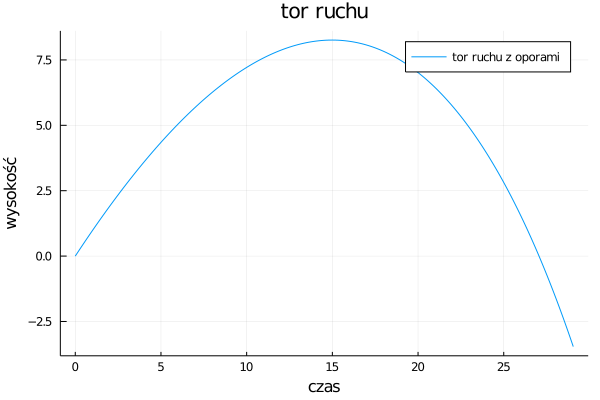

In [87]:
plot(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g), 0, tₗ + tᵤ,
    xlabel = "czas", 
    ylabel = "wysokość",
    label = "tor ruchu z oporami",
    legend =:topright,
    title = "tor ruchu")

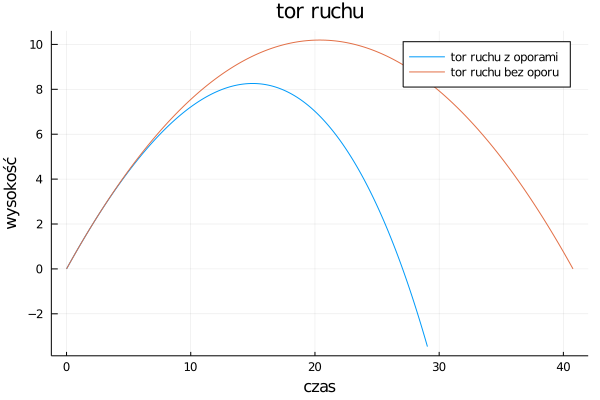

In [88]:
plot!(x(v₀, α), y(v₀, α, g), 0, tₗ + tᵤ,
    label = "tor ruchu bez oporu")